## Logit Function

Applying a natural logarithm function to the odds of an event, you get the logit function.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

Text(0, 0.5, 'Logit -L')

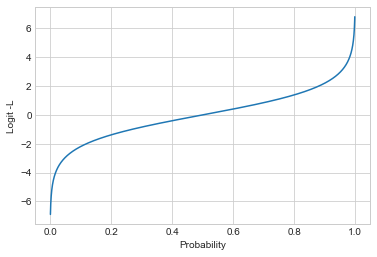

In [2]:
def logit(x):
    return np.log(x / (1-x))

x = np.arange(0.001, 0.999, 0.0001)
y = [logit(n) for n in x]
plt.plot(x, y)
plt.xlabel("Probability")
plt.ylabel("Logit -L")

Text(0, 0.5, 'Probability')

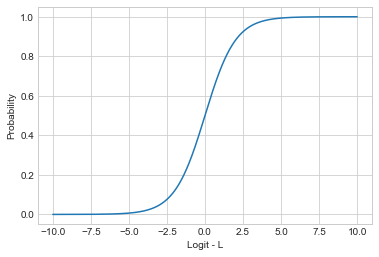

In [3]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

x = np.arange(-10, 10, 0.0001)
y = [sigmoid(n) for n in x]
plt.plot(x, y)
plt.xlabel("Logit - L")
plt.ylabel("Probability")

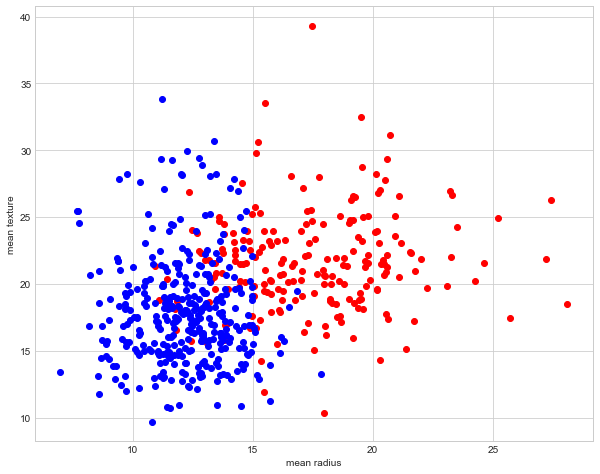

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#---copy from dataset into a 2-d list---
X = []
for target in range(2):
    X.append([[], []])
    for i in range(len(cancer.data)): # target is 0 or 1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0]) # first feature - mean radius
            X[target][1].append(cancer.data[i][1]) # second feature — mean texture
            
colours = ("r", "b") # r: malignant, b: benign
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               c=colours[target])

ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()


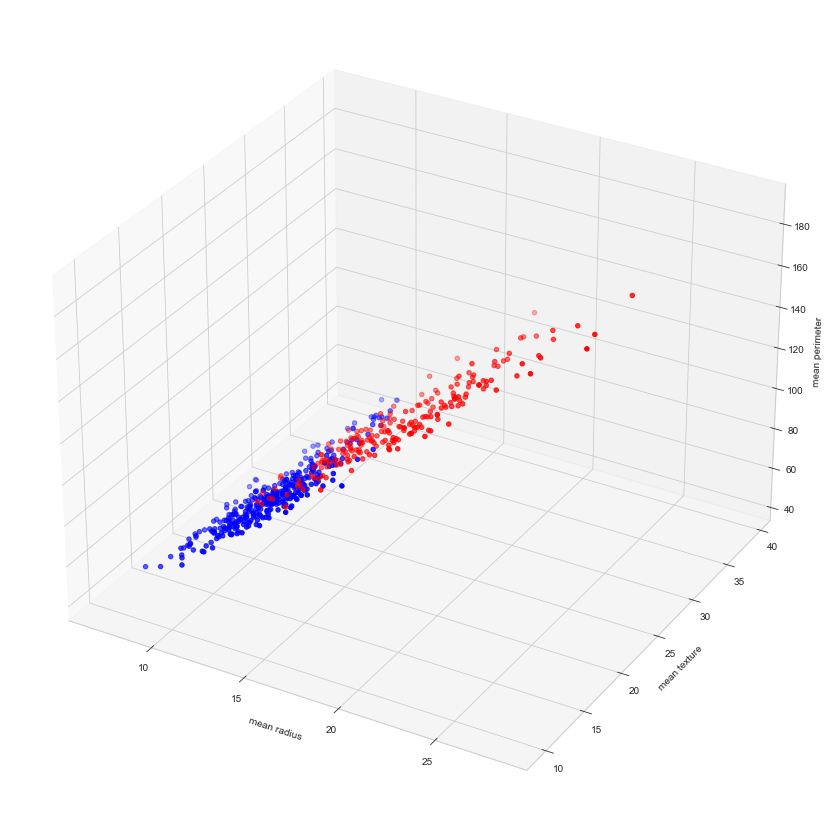

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#---copy from dataset into a 2-d array---
X = []
for target in range(2):
    X.append([[], [], []])
    for i in range(len(cancer.data)): # target is 0,1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0])
            X[target][1].append(cancer.data[i][1])
            X[target][2].append(cancer.data[i][2])

colors = ("r", "b") # r: malignant, b: benign
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               X[target][2],
               c=colors[target])
    
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()

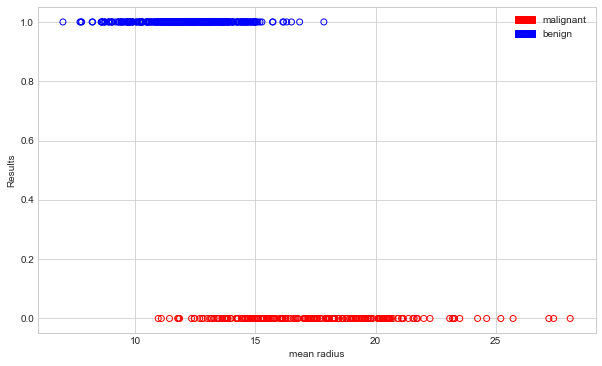

In [6]:
import matplotlib.patches as mpatches

cancer = load_breast_cancer()
X = cancer.data[:, 0]
y = cancer.target
color = {0: 'red', 1: 'blue'}

plt.figure(figsize=(10, 6))
plt.scatter(X,y, 
            facecolors = 'none',
            edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),
            cmap=colors)

plt.xlabel("mean radius")
plt.ylabel("Results")

red = mpatches.Patch(color = 'red', label = 'malignant')
blue = mpatches.Patch(color = 'blue', label = 'benign')

plt.legend(handles = [red, blue], loc =1)

In [7]:

from sklearn import linear_model
import numpy as np

log_regress = linear_model.LogisticRegression()

#---train the model---
log_regress.fit(X = np.array(X).reshape(len(X), 1),
                y=y)

#---print trained model intercept
print(log_regress.intercept_)

#---print trained model coefficients---
print(log_regress.coef_)


[15.120902]
[[-1.02475609]]


Text(0, 0.5, 'Probability')

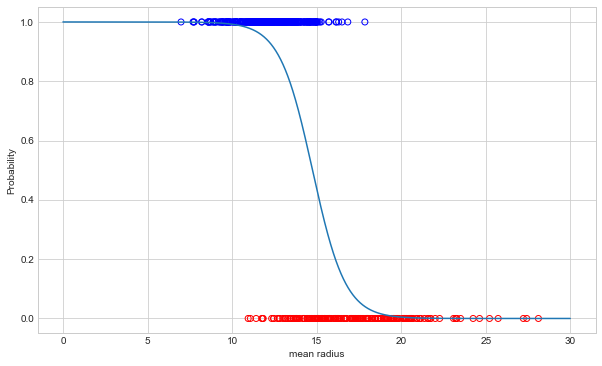

In [8]:
def sigmoid(x):
    return (1 / (1 +
        np.exp(-(log_regress.intercept_[0] +
        (log_regress.coef_[0][0] * x)))))

x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]

plt.figure(figsize=(10,6))
plt.scatter(X,y, 
    facecolors='none',
    edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:
    colors[x]),
    cmap=colors)

plt.plot(x1,y1)
plt.xlabel("mean radius")
plt.ylabel("Probability")

In [9]:
print(log_regress.predict_proba([[20]]))
print(log_regress.predict([[20]])[0])


[[0.99538685 0.00461315]]
0


In [10]:

print(log_regress.predict_proba([[8]]))
print(log_regress.predict([[8]])[0])

[[9.84046071e-04 9.99015954e-01]]
1


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    cancer.data,
                                    cancer.target,
                                    test_size = 0.25,
                                    random_state = 1,
                                    stratify = cancer.target)

In [12]:
from sklearn import linear_model
X = X_train[:, 0:30]
y = y_train
log_regress = linear_model.LogisticRegression()
log_regress.fit(X = X,
                y = y)

print(log_regress.intercept_)
print(log_regress.coef_)


[0.11177375]
[[ 0.62486536  0.38081998  0.42181052 -0.0260909  -0.01856499 -0.10039921
  -0.14228721 -0.05689117 -0.03452993 -0.00498867  0.02867197  0.19200173
   0.04991266 -0.12239059 -0.00162515 -0.02267043 -0.03162131 -0.00754228
  -0.00640247 -0.00220941  0.72600447 -0.45642548 -0.26447382 -0.00795009
  -0.03705552 -0.33425004 -0.42276876 -0.11570063 -0.10068326 -0.03174408]]


c:\Users\drebi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
#---get the predicted probabilities and convert into a dataframe---
preds_prob = pd.DataFrame(log_regress.predict_proba(X=X_test))

#---assign column name to prediction
preds_prob.columns = ["Malignant", "Benign"]

#---get the predicted class labels---
preds = log_regress.predict(X=X_test)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

#---actual diagnosis---
original_result = pd.DataFrame(y_test)
original_result.columns = ["Original Result"]

#---merge the three dataframe into one---
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head())



   Malignant        Benign  Prediction  Original Result
0   0.999764  2.356649e-04           0                0
1   0.999864  1.360471e-04           0                0
2   0.179069  8.209309e-01           1                1
3   1.000000  1.276890e-08           0                0
4   0.116350  8.836500e-01           1                0


In [14]:
from sklearn import metrics

#---generate table of predictions vs actual
print("---Confusion Matrix---")
print(pd.crosstab(preds, y_test))

---Confusion Matrix---
col_0   0   1
row_0        
0      48   5
1       5  85


In [15]:
print("---Accuracy---")
print(log_regress.score(X = X_test,
                        y = y_test))

---Accuracy---
0.9300699300699301


In [16]:
# View summary of common classification metrics
print("---Metrices---")
print(metrics.classification_report(
    y_true= y_test,
    y_pred= preds
))

---Metrices---
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        53
           1       0.94      0.94      0.94        90

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



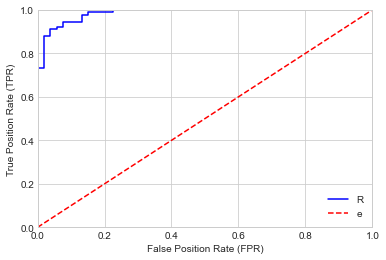

In [17]:
from sklearn.metrics import roc_curve, auc

#---find the predicted probabilities using the test set
probs = log_regress.predict_proba(X_test)
preds = probs[:,1]

#---find the FPR, TPR, and threhold---
fpr, tpr, threshold = roc_curve(y_test, preds)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0, 1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Position Rate (TPR)')
plt.xlabel('False Position Rate (FPR)')
plt.legend('Receiver Operating Character (ROC)')
plt.show()